In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [28]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
96971,City Hotel,0,183,2018,November,37,8,0,3,1,...,1,No Deposit,44.0,NaN,0,Family,100.0,0,0,Check-Out
24181,Resort Hotel,0,468,2018,July,20,12,0,2,2,...,0,No Deposit,249.0,NaN,0,Family,67.0,0,0,Check-Out
107093,City Hotel,0,137,2019,May,10,6,1,1,2,...,0,No Deposit,37.0,NaN,0,Family,80.0,0,1,Check-Out
69965,City Hotel,1,169,2019,August,23,8,0,3,2,...,0,Non Refund,19.0,NaN,0,Personal,170.0,0,0,Canceled
34516,Resort Hotel,0,241,2019,May,12,21,2,5,2,...,0,No Deposit,273.0,NaN,0,Family,41.6,0,0,Check-Out


# Data Exploration

In [29]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

Conclusion :
1. Float64 ( 4 features), int64 (16 features),  object (9 features)
2. Company, agent, city and children has a missing value

In [30]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2018.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2017.000000   
25%         0.000000      18.000000        2018.000000   
50%         0.000000      69.000000        2018.000000   
75%         1.000000     160.000000        2019.000000   
max         1.000000     737.000000        2019.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   

In [31]:
# List of numerical columns
num_cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_weekend_nights',
            'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
            'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
            'total_of_special_requests']

# Convert selected columns to object type
cat_cols = [col for col in df.columns if col not in num_cols]
df[cat_cols] = df[cat_cols].astype(object)

In [32]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0


In [33]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_numb

In [34]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include=["object"]).columns:
    print(f"{column}: {df[column].unique()}")


Unique values in categorical columns:
hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
arrival_date_week_number: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
arrival_date_day_of_month: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31]
meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara'

In [35]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display missing values as percentages
print("\nMissing values (as percentages):")
print(missing_percent)



Missing values (as percentages):
hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
city                               0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.68623

Conclusion :
1. Terdapat missing/null value pada fitur company, city, children, agent

# Data Preprocessing

In [36]:
df_process = df.copy()

### Handle Missing Value

In [37]:
df_process['company'] = df_process['company'].fillna(0)
df_process['agent'] = df_process['agent'].fillna(0)
df_process['city'] = df_process['city'].fillna('Unknown')
df_process['children'] = df_process['children'].fillna(0)

In [38]:
# Calculate the percentage of missing values for each column
missing_percent = (df_process.isnull().sum() / len(df_process)) * 100

# Display missing values as percentages
print("\nMissing values (as percentages):")
print(missing_percent)



Missing values (as percentages):
hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_weekdays_nights          0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
city                              0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr             

### Correcting Unsuitable Value

In [39]:
df_process = df_process.replace({'meal': {'Undefined':'No Meal'}})
df_process['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Drop Unnecesary Data

In [40]:
# Calculate total number of guests for each booking
df_process['total_guests'] = df_process['adults'] + df_process['children'] + df_process['babies']

In [41]:
print('Data with 0 guest: {0} out of {1} all data'.format(df_process[df_process['total_guests'] == 0].shape[0], df_process.shape[0]))

Data with 0 guest: 180 out of 119390 all data


In [42]:
# Keep only rows where the total number of guests is greater than 0
df_process = df_process[df_process['total_guests'] > 0]

# Drop the 'total_guests' column as it was only used for filtering
df_process.drop(columns=['total_guests'], inplace=True)

# Display the resulting dataset
df_process.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out


In [43]:
df_clean = df_process.copy()


In [44]:
df_clean.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
41194,City Hotel,1,39,2017,October,33,14,0,2,2,...,0,No Deposit,6.0,0.0,0,Family,101.5,0,0,Canceled
26863,Resort Hotel,0,14,2018,October,33,9,0,4,3,...,1,No Deposit,250.0,0.0,0,Personal,268.5,0,1,Check-Out
87994,City Hotel,0,67,2018,June,18,26,0,3,3,...,0,No Deposit,14.0,0.0,0,Personal,121.1,0,1,Check-Out
19433,Resort Hotel,0,5,2017,February,51,19,0,1,2,...,0,No Deposit,0.0,0.0,0,Family,43.0,0,1,Check-Out
93344,City Hotel,0,14,2018,September,30,20,0,1,1,...,0,No Deposit,8.0,0.0,0,Personal,96.0,0,1,Check-Out
94717,City Hotel,0,43,2018,October,33,7,2,0,2,...,0,No Deposit,9.0,0.0,0,Personal,135.9,0,1,Check-Out
30646,Resort Hotel,0,21,2018,January,49,28,1,1,1,...,0,No Deposit,0.0,0.0,0,Family,45.0,0,0,Check-Out
22130,Resort Hotel,0,0,2018,May,12,17,0,1,1,...,0,No Deposit,314.0,0.0,0,Family,34.4,0,0,Check-Out
66335,City Hotel,1,144,2019,June,16,17,1,3,2,...,0,No Deposit,9.0,0.0,0,Personal,99.0,0,0,Canceled
71824,City Hotel,1,414,2019,September,28,13,0,2,2,...,0,No Deposit,6.0,0.0,0,Family,80.0,0,0,Canceled


# Monthly Booking Analysis

In [45]:
# Convert 'arrival_date_month' column to categorical to preserve month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_clean['arrival_date_month'] = pd.Categorical(df_clean['arrival_date_month'], categories=month_order, ordered=True)

# Create a pivot table to show the comparison
pivot_table = df_clean.pivot_table(index=['arrival_date_month', 'arrival_date_year', 'hotel'],
                               values='reservation_status', aggfunc='count')

# Display the pivot table
print(pivot_table)

                                                   reservation_status
arrival_date_month arrival_date_year hotel                           
January            2017              City Hotel                1233.0
                                     Resort Hotel              1104.0
                   2018              City Hotel                3103.0
                                     Resort Hotel              1331.0
February           2017              City Hotel                1649.0
                                     Resort Hotel              1264.0
                   2018              City Hotel                2465.0
                                     Resort Hotel              1381.0
March              2018              City Hotel                1364.0
                                     Resort Hotel               884.0
                   2019              City Hotel                2366.0
                                     Resort Hotel              1307.0
April              2

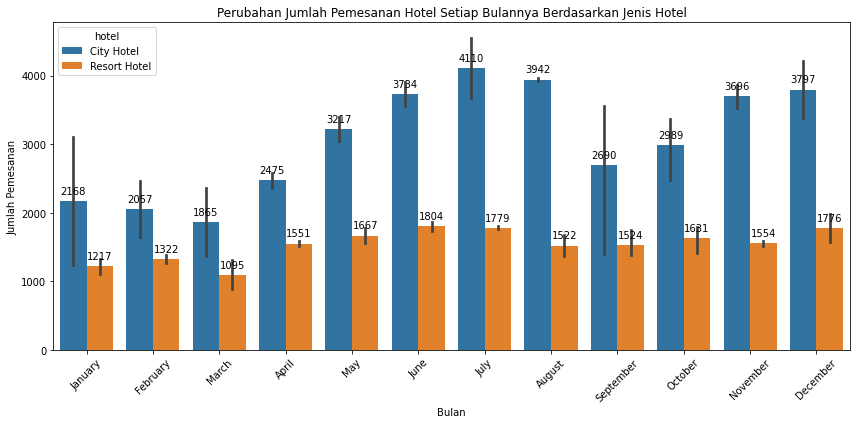

In [46]:
df_clean['arrival_date_month'] = pd.Categorical(df_clean['arrival_date_month'], categories=month_order, ordered=True)

# Create a pivot table to show the comparison
pivot_table = df_clean.pivot_table(index=['arrival_date_month', 'arrival_date_year', 'hotel'],
                               values='reservation_status', aggfunc='count').reset_index()

# Plot the data using Seaborn bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivot_table, x='arrival_date_month', y='reservation_status', hue='hotel')
plt.title('Perubahan Jumlah Pemesanan Hotel Setiap Bulannya Berdasarkan Jenis Hotel')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels for the bar heights
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [47]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

In [48]:
bins = [0, 7, 14, 21, df_clean['total_stays'].max()]
labels = ['1 week', '2 weeks', '3 weeks', '4+ weeks']
df_clean['stay_duration'] = pd.cut(df_clean['total_stays'], bins=bins, labels=labels)

In [49]:
cancellation_by_stay = df_clean.groupby(['hotel', 'stay_duration', 'is_canceled']).size().unstack(fill_value=0)
cancellation_by_stay['total_bookings'] = cancellation_by_stay.sum(axis=1)
cancellation_by_stay['cancellation_rate'] = cancellation_by_stay[1] / cancellation_by_stay['total_bookings'] * 100


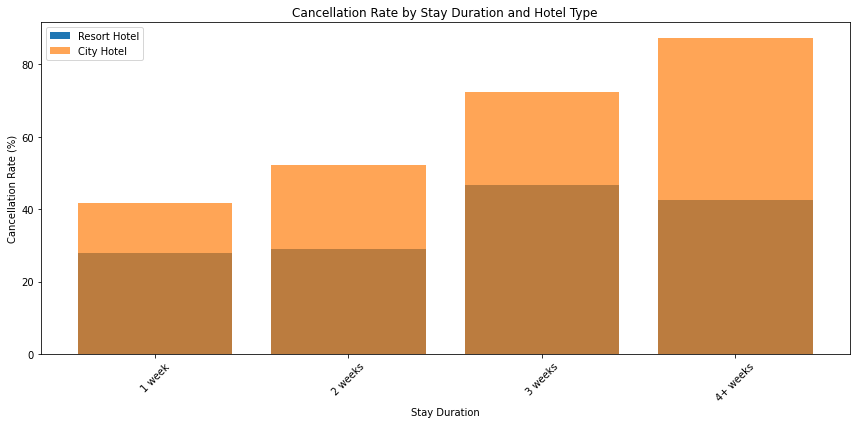

In [50]:
import matplotlib.pyplot as plt

cancellation_by_stay.reset_index(inplace=True)
resort_data = cancellation_by_stay[cancellation_by_stay['hotel'] == 'Resort Hotel']
city_data = cancellation_by_stay[cancellation_by_stay['hotel'] == 'City Hotel']

plt.figure(figsize=(12, 6))
plt.bar(resort_data['stay_duration'], resort_data['cancellation_rate'], label='Resort Hotel')
plt.bar(city_data['stay_duration'], city_data['cancellation_rate'], label='City Hotel', alpha=0.7)
plt.xlabel('Stay Duration')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Stay Duration and Hotel Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [56]:
# Create a new column 'lead_time_category'
bins = [0, 30, 60, 90, 120, 150, 180, float('inf')]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180+']
df_clean['lead_time_category'] = pd.cut(df_clean['lead_time'], bins=bins, labels=labels)

In [57]:
cancel_vs_lead_time = df_clean.groupby(['lead_time_category', 'hotel', 'is_canceled'])['reservation_status'].count().unstack(fill_value=0)
cancel_vs_lead_time.reset_index(inplace=True)
cancel_vs_lead_time['cancellation_rate'] = cancel_vs_lead_time[1] / (cancel_vs_lead_time[0] + cancel_vs_lead_time[1])

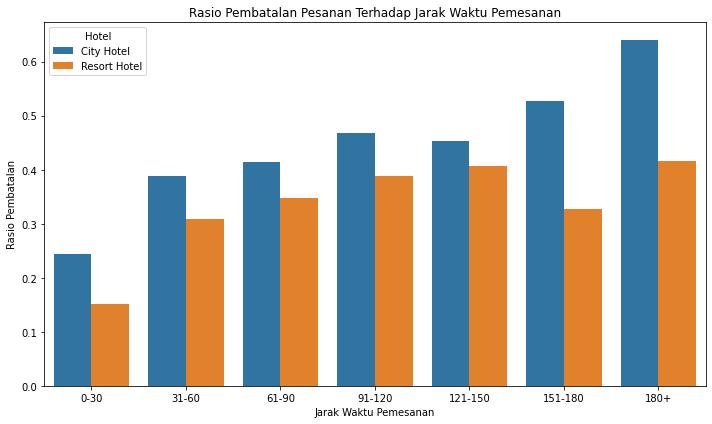

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time_category', y='cancellation_rate', hue='hotel', data=cancel_vs_lead_time)
plt.title('Rasio Pembatalan Pesanan Terhadap Jarak Waktu Pemesanan')
plt.xlabel('Jarak Waktu Pemesanan')
plt.ylabel('Rasio Pembatalan')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()
